# Using the sub-giant age catalogue from Xiang & Rix 2022, lets find Sausage stars and check their age distribution

In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LogNorm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/XianfRix-subgiants-galapot.fits'
tb = fits.open(path)
data = tb[1].data 


In [3]:
# parent mask to get good quality data
mask = (data['AGE']>0)&(data['AGE']<14)&(data['SNR_G']>80)&(data['TEFF']>4000)&(data['TEFF']<7000)&(data['LOGG']>2.)&(data['LOGG']<5)&\
            (~np.isnan(data['ANGLE_PHI']))&(~np.isnan(data['LZ']))&(~np.isnan(data['ecc_1']))&(data['RUWE']<1.2)&\
            ((data['AGE_ERR']/data['AGE'])<0.1)&(data['FEH']<-0.5)
print(len(data[mask]))


11336


# select Sausage stars based on orbits

124 294


Text(0.5, 0, 'Angular Momentum')

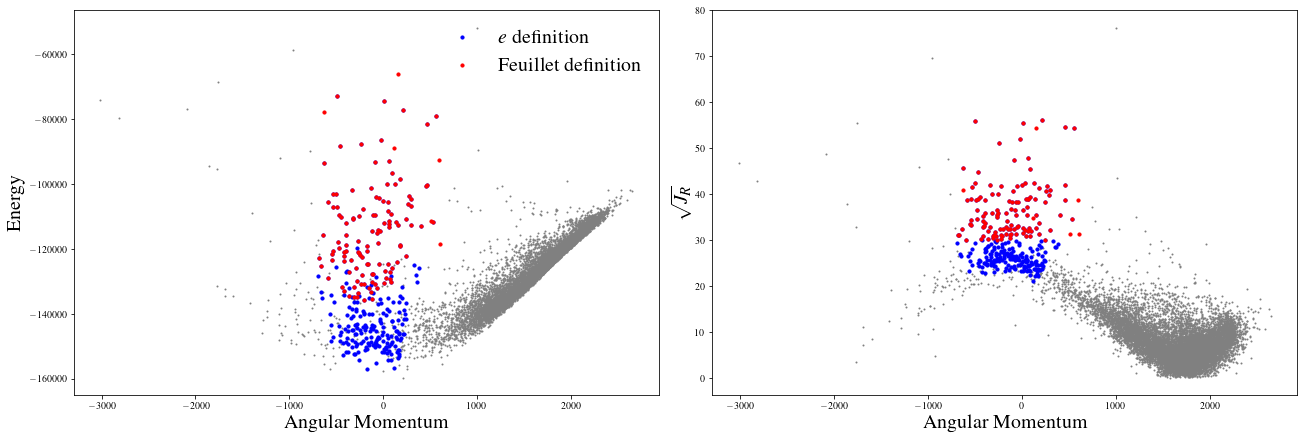

In [7]:
# Feuillet way (high purity)
mask_ges_f = (np.abs(data['LZ'])<700)&(np.sqrt(data['actions'][:,0])>30)
# ecc way (high quantity)
mask_ges_ecc = (np.abs(data['LZ'])<700) & (data["ecc_1"]>0.8)
print(len(data[mask&mask_ges_f]),len(data[mask&mask_ges_ecc]))

plt.figure(figsize=(18,6),facecolor='white',constrained_layout=True,rasterized=True)

# E-Lz diagram
plt.subplot(1,2,1)
plt.scatter(data['LZ'][mask],data['E_1'][mask],s=1,c='gray')
plt.scatter(data['LZ'][mask&mask_ges_ecc],data['E_1'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
plt.scatter(data['LZ'][mask&mask_ges_f],data['E_1'][mask&mask_ges_f],s=10,c='r',label='Feuillet definition')
plt.ylabel('Energy',fontsize=20)
plt.xlabel('Angular Momentum',fontsize=20)
plt.legend(frameon=False,fontsize=20)

plt.subplot(1,2,2)
plt.scatter(data['LZ'][mask],np.sqrt(data['actions'][:,0][mask]),s=1,c='gray')
plt.scatter(data['LZ'][mask&mask_ges_ecc],np.sqrt(data['actions'][:,0][mask&mask_ges_ecc]),s=10,c='b',label='$e$')
plt.scatter(data['LZ'][mask&mask_ges_f],np.sqrt(data['actions'][:,0][mask&mask_ges_f]),s=10,c='r',label='F')
plt.ylabel('$\sqrt{J_R}$',fontsize=20)
plt.xlabel('Angular Momentum',fontsize=20)


In [8]:
print(len(data[mask&mask_ges_f]))

124


# Check to make sure they aren't in binaries by comparing the RVs of LAMOST with Gaia

In [ ]:
plt.figure(figsize=(28,7),facecolor='white',constrained_layout=True,rasterized=True)
plt.subplot(1,3,1)
plt.scatter(data['VLOS'][mask],data['dr2_radial_velocity'][mask],c='gray',s=1)
# plt.scatter(data['VLOS'][mask&mask_ges_ecc],data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['VLOS'][mask&mask_ges_f],data['dr2_radial_velocity'][mask&mask_ges_f],s=30,c='r',label='Feuillet definition')
plt.ylabel('Gaia RVs',fontsize=20)
plt.xlabel(r'LAMOST RVs',fontsize=20)
plt.legend(frameon=False,fontsize=20)

plt.subplot(1,3,2)
plt.scatter(data['AGE'][mask],data['VLOS'][mask]-data['dr2_radial_velocity'][mask],c='gray',s=1)
# plt.scatter(data['AGE'][mask&mask_ges_ecc],data['VLOS'][mask&mask_ges_ecc]-data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['AGE'][mask&mask_ges_f],data['VLOS'][mask&mask_ges_f]-data['dr2_radial_velocity'][mask&mask_ges_f],s=30,c='r',label='Feuillet definition')
plt.ylabel('LAMOST RVs - Gaia RVs',fontsize=20)
plt.xlabel(r'AGE [Gyrs]',fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.ylim(-30,30)

plt.subplot(1,3,3)
plt.scatter(data['FEH'][mask],data['VLOS'][mask]-data['dr2_radial_velocity'][mask],c='gray',s=1)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['VLOS'][mask&mask_ges_ecc]-data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['FEH'][mask&mask_ges_f],data['VLOS'][mask&mask_ges_f]-data['dr2_radial_velocity'][mask&mask_ges_f],s=30,c='r',label='Feuillet definition')
plt.ylabel('LAMOST RVs - Gaia RVs',fontsize=20)
plt.xlabel(r'[Fe/H]',fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.ylim(-30,30)


In [ ]:
print(len(data['dr2_radial_velocity'][mask&(~np.isnan(data['dr2_radial_velocity']))]))
print(len(data['dr2_radial_velocity'][mask&(~np.isnan(data['dr2_radial_velocity']))&mask_ges_f]))

# Do the same with APOGEE DR17

In [ ]:
# LOAD THE DATA
path2 = '/Users/dhortadarrington/Documents/Master/data/XiandandRix_APOGEEDR17.fits'
tb2 = fits.open(path2)
data_apo = tb2[1].data 


In [ ]:
mask_ges_apo = np.isin(data_apo['SPECID'],data['SPECID'][mask&mask_ges_f])
mask_apo = np.isin(data['SPECID'],data_apo['SPECID'])
mask_apo2 = np.isin(data_apo['SPECID'],data['SPECID'])
print(len(data_apo[mask_ges_apo]))
print(len(data[mask_apo&mask]))

In [ ]:
# LOAD THE DATA
path3 = '/Users/dhortadarrington/Documents/Master/data/XiandandRix_GALAHDR3.fits'
tb3 = fits.open(path3)
data_galah = tb3[1].data 


In [ ]:
mask_ges_galah = np.isin(data_galah['SPECID'],data['SPECID'][mask&mask_ges_f])
mask_galah = np.isin(data['SPECID'],data_galah['SPECID'])
mask_galah2 = np.isin(data_galah['SPECID'],data['SPECID'][mask])
print(len(data_galah[mask_ges_galah]))
print(len(data[mask_galah&mask]))


In [ ]:
print(len(data['VLOS'][mask_galah]))
print(len(data_galah['rv_galah'][mask_galah2]))

In [ ]:
plt.figure(figsize=(21,7),facecolor='white',constrained_layout=True,rasterized=True)
plt.subplot(1,2,1)
plt.scatter(data['VLOS'][mask_apo],data_apo['VHELIO_AVG'][mask_apo2],c='gray',s=1)
# plt.scatter(data['VLOS'][mask&mask_ges_ecc],data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['VLOS'][mask&mask_apo&mask_ges_f],data_apo['VHELIO_AVG'][mask_ges_apo],s=100,c='r',label='GES')
plt.ylabel('APOGEE RVs',fontsize=20)
plt.xlabel(r'LAMOST RVs',fontsize=20)
plt.legend(frameon=False,fontsize=20)

plt.subplot(1,2,2)
plt.scatter(data['VLOS'][mask_galah&mask],data_galah['rv_galah'][mask_galah2],c='gray',s=1)
# plt.scatter(data['VLOS'][mask&mask_ges_ecc],data['dr2_radial_velocity'][mask&mask_ges_ecc],s=30,c='b',label='$e$ definition')
plt.scatter(data['VLOS'][mask&mask_galah&mask_ges_f],data_galah['rv_galah'][mask_ges_galah],s=100,c='r',label='GES')
plt.ylabel('GALAH RVs',fontsize=20)
plt.xlabel(r'LAMOST RVs',fontsize=20)
plt.legend(frameon=False,fontsize=20)


# Plot abundances of stars in the parent sample below 8 Gyr (without GES stars) to compare to GES samples

For the Feulliet sample

In [9]:
# 9 stars with a SNR cut of >80
mask_teff = (data['TEFF']<6500)
print(len(data['FEH'][mask&mask_ges_f&mask_teff]))
print((data['AGE'][mask&mask_ges_f&mask_teff]))

120
[10.012705  13.147913  11.338382  10.560813  11.653838  11.794936
 11.172107  12.8349285 10.977046  11.100535   9.873262  12.564812
 10.326628  11.197861  13.458249  11.207374  11.807765  11.806796
 10.786651  11.585695  12.138201  12.153874  13.39912    8.572374
 12.277109  11.481838  10.9328575 10.082444  11.407954  13.219907
 12.768102  11.384485  10.452453  10.729415  13.724528  12.437102
 11.828331  11.623878  11.889592  12.359261  11.734633  11.6671295
 12.022463  10.487785  11.685687  12.879788  11.264618  10.545291
 11.075292  10.376261  12.166569  10.529627  12.448616  13.711622
 10.896438  13.636505  10.524053  10.100045  12.522787  10.08642
 10.631827  12.610391   9.330786  12.290308  10.364023  12.859019
 12.232051  11.332722   6.618669  11.870439  11.636277  11.110942
 12.573765  12.467582  13.129342  10.922672  11.405582  11.575415
 12.462538  11.851396  13.318632  13.115779  11.488552  10.707606
 13.082925  12.64256   13.778395  11.355406  11.605673  10.574024
 10.85

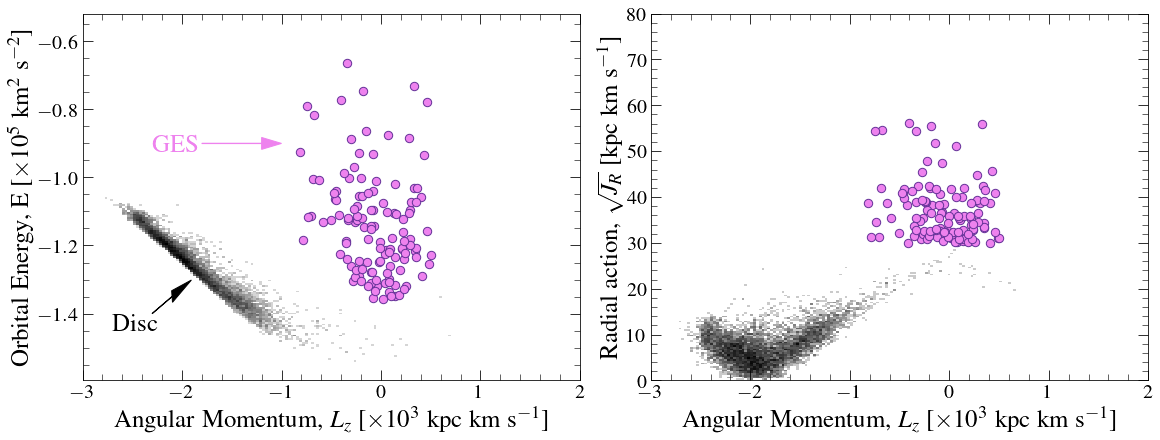

In [164]:
# Feuillet way (high purity)

fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Selecting $Gaia$-Enceladus/Sausage stars',fontsize=35,x=0.52,y=1.1)

# E-Lz diagram
plt.subplot(1,2,1)
plt.hist2d(data['actions'][:,1][mask]/1e3,data['E_1'][mask]/1e5,bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,data['E_1'][mask&mask_ges_f]/1e5,s=70,c='violet',label='Feuillet definition',edgecolors='rebeccapurple',rasterized=True)
plt.ylabel(r'Orbital Energy, E [$\times10^{5}$ km$^{2}$ s$^{-2}$]',fontsize=25)
plt.arrow(-1.8,-0.9,0.6,0,color='violet',head_width=0.035, head_length=0.2)
plt.text(-2.3,-0.925,'GES',color='violet',fontsize=25,fontweight='bold')

plt.arrow(-2.3,-1.4,0.2,0.05,color='k',head_width=0.035, head_length=0.2)
plt.text(-2.7,-1.45,'Disc',color='k',fontsize=25,fontweight='bold')

plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
# plt.ylim(-1,0.4)


plt.subplot(1,2,2)
plt.hist2d(data['actions'][:,1][mask]/1e3,np.sqrt(data['actions'][:,0][mask]),bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,np.sqrt(data['actions'][:,0][mask&mask_ges_f]),s=70,c='violet',label='F',edgecolors='rebeccapurple',rasterized=True)
plt.ylabel(r'Radial action, $\sqrt{J_R}$ [kpc km s$^{-1}$]',fontsize=25)
plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
plt.ylim(0,80)

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/dynamic-selection-gala2.pdf',dpi=200, bbox_inches = 'tight')


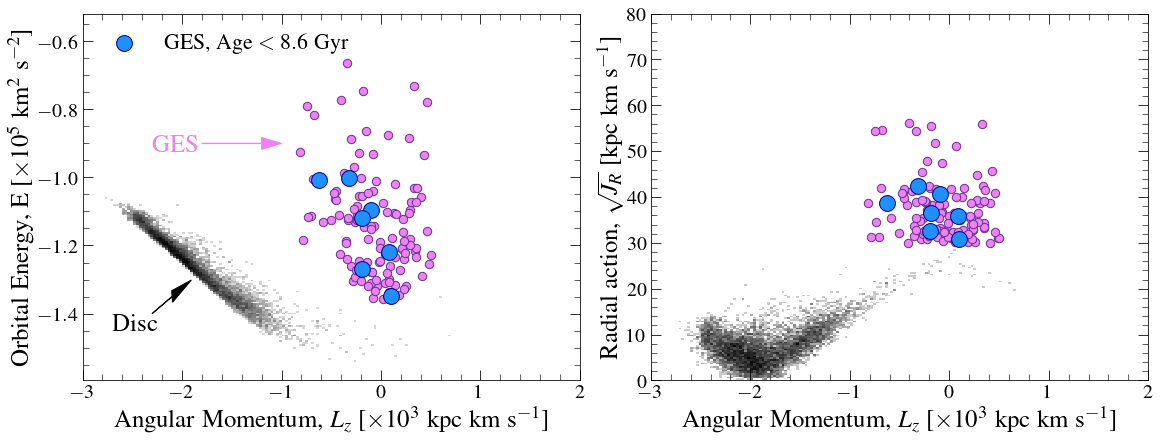

In [41]:
# Feuillet way (high purity)

fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Selecting $Gaia$-Enceladus/Sausage stars',fontsize=35,x=0.52,y=1.1)

# E-Lz diagram
plt.subplot(1,2,1)
plt.hist2d(data['actions'][:,1][mask]/1e3,data['E_1'][mask]/1e5,bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,data['E_1'][mask&mask_ges_f]/1e5,s=70,c='violet',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(data['actions'][:,1][m]/1e3,data['E_1'][m]/1e5,s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')
plt.ylabel(r'Orbital Energy, E [$\times10^{5}$ km$^{2}$ s$^{-2}$]',fontsize=25)
plt.arrow(-1.8,-0.9,0.6,0,color='violet',head_width=0.035, head_length=0.2)
plt.text(-2.3,-0.925,'GES',color='violet',fontsize=25,fontweight='bold')
plt.arrow(-2.3,-1.4,0.2,0.05,color='k',head_width=0.035, head_length=0.2)
plt.text(-2.7,-1.45,'Disc',color='k',fontsize=25,fontweight='bold')
plt.legend(frameon=False, fontsize=22,loc='upper left')

plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
# plt.ylim(-1,0.4)


plt.subplot(1,2,2)
plt.hist2d(data['actions'][:,1][mask]/1e3,np.sqrt(data['actions'][:,0][mask]),bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,np.sqrt(data['actions'][:,0][mask&mask_ges_f]),s=70,c='violet',label='F',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(data['actions'][:,1][m]/1e3,np.sqrt(data['actions'][:,0][m]),s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')
plt.ylabel(r'Radial action, $\sqrt{J_R}$ [kpc km s$^{-1}$]',fontsize=25)
plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
plt.ylim(0,80)

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/dynamic-selection-gala3.pdf',dpi=200, bbox_inches = 'tight')


In [ ]:
plt.scatter(data['TEFF'][m],data['LOGG'][m],s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')


# Randomly sample the age values within the uncertainties to get more robust age measurements

In [10]:
ges = mask&mask_ges_f&mask_teff
print(len(data[ges]))

120


In [11]:
percen_ages = np.percentile(data['AGE'][ges],[5,16,50,84,95])
print(percen_ages[0])
print(len(data[ges][data['AGE'][ges]<percen_ages[0]+0.03]))


8.569243097305298
7


In [167]:
n = 10000
ages_samp = np.zeros((len(data['AGE']),n))

for indx, i in tqdm.tqdm_notebook(enumerate(data['AGE'])):
    ages_samp[indx] = np.random.normal(i, data['AGE_ERR'][indx], n)


0it [00:00, ?it/s]

KeyboardInterrupt: 

In [168]:
# np.save('../sav/ages_samp.npy',ages_samp)
ages_samp = np.load('../sav/ages_samp.npy',allow_pickle=True)

In [169]:
# new ages
ages = np.nanmean(ages_samp,axis=1)
ages_err = np.nanstd(ages_samp,axis=1)


In [170]:
print(np.shape(ages_samp[ges]))

(120, 10000)


In [171]:
num_stars = []

for indx, i in tqdm.tqdm_notebook(enumerate(ages_samp[ges].T)):
    
    percentile_test = np.percentile(i,[5,16,50,84,95])
#     num_stars.append(len(i[i<percentile_test[0]]))
    num_stars.append(len(i[i<percentile_test[0]+0.03]))
    

0it [00:00, ?it/s]

In [172]:
print(len(np.where(np.array(num_stars)==6)[0]))
print(len(np.where(np.array(num_stars)==7)[0]))
print(len(np.where(np.array(num_stars)==8)[0]))

print(len(np.where(np.array(num_stars)==6)[0])/len(num_stars))
print(len(np.where(np.array(num_stars)==7)[0])/len(num_stars))
print(len(np.where(np.array(num_stars)==8)[0])/len(num_stars))

1099
8570
325
0.1099
0.857
0.0325


In [120]:
np.save('../sav/num_stars.npy',num_stars)

(array([1.099e+03, 0.000e+00, 0.000e+00, 8.570e+03, 0.000e+00, 0.000e+00,
        3.250e+02, 0.000e+00, 0.000e+00, 6.000e+00]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 10 artists>)

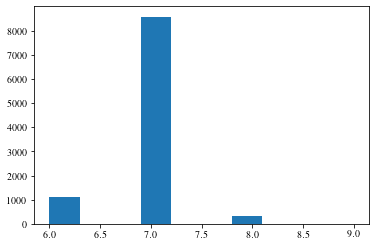

In [121]:
plt.hist(num_stars)

# Loop over x times and compute percentiles. Then figure out how many time there are outliers in the data

In [186]:
import tqdm
t = 10000

random_samps = np.zeros((t, len(data['AGE'][ges])))
percen_random = np.zeros((t,5))

for indx, i in tqdm.tqdm_notebook(enumerate(range(t))):
    random_samps[indx] = np.random.choice(data['AGE'][ges], size=120, replace=True)
#     percen_random[indx] = np.percentile(random_samps,[5,16,50,84,95],axis=0)
    

0it [00:00, ?it/s]

In [187]:
np.save('../sav/random_samps.npy',random_samps)
# np.save('../sav/percen_random.npy',percen_random)


In [189]:
random_samps = np.load('../sav/random_samps.npy',allow_pickle=True)
# percen_random = np.load('../sav/percen_random.npy',allow_pickle=True)
print(np.shape(random_samps))

(10000, 120)


In [192]:
percen_random = np.percentile(random_samps,[5,16,50,84,95],axis=1)
print(np.shape(percen_random))

(5, 10000)


[9.33078575 8.0518465  9.86192722 ... 9.63077011 7.22832918 9.29286518]


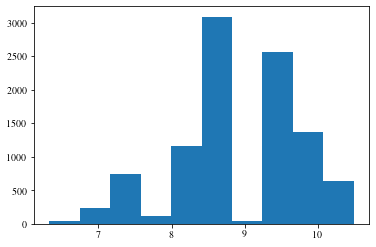

In [193]:
plt.hist(percen_random[0])
print(percen_random[0])

In [174]:
print(percen_random[0])
print((random_samps[0][random_samps[0]<percen_random[0][0]]))
print(len(random_samps[0][random_samps[0]<percen_random[0][0]]))

[ 8.57188087 10.45682328 11.62506725 12.76302995 13.36623925]
[8.04718567 6.62022024 7.22463148 6.62022024 8.5145751  8.5145751 ]
6


In [194]:
percen_ges_ages_original = np.percentile(data['AGE'][ges],[5,16,50,84,95])
print(percen_ges_ages_original)

[ 8.5692431  10.45357376 11.61477518 12.76733368 13.36234436]


In [196]:
outliers = []
outliers_ids = []

for indx, i in enumerate(random_samps):
    outliers.append(len(i[i<percen_ges_ages_original[0]+0.03]))
    outliers_ids.append(data['AGE'][ges][i<percen_ges_ages_original[0]+0.03])
    

In [197]:
np.save('../sav/outliers.npy',outliers)
# np.save('../sav/outliers_ids.npy',outliers_ids)

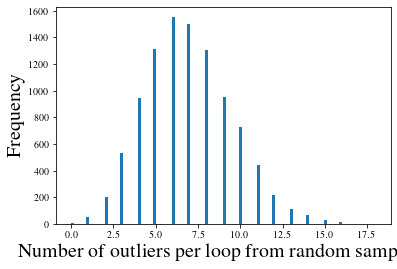

In [198]:
plt.figure(facecolor='white')
plt.hist(outliers,100)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Number of outliers per loop from random sampling', fontsize=20)

plt.show()


In [199]:
outliers = np.array(outliers)
print(len(outliers[outliers<3])/len(outliers))

0.027


In [ ]:
outliers_ids_flat = [x for xs in outliers_ids for x in xs]

In [ ]:
plt.hist(outliers_ids_flat)

In [26]:
print(np.shape(ages_samp))

(247103, 10000)


# Make all the plots with the sampled ages

In [39]:
percen_ages = np.percentile(ages[ges],[5,16,50,84,95])
print('Median: '+str(percen_ages[2]))
print('Upper: '+str(percen_ages[3]-percen_ages[2]))
print('Lower: '+str(percen_ages[2]-percen_ages[1]))
print('Std: '+str((percen_ages[3]-percen_ages[1])/2))
print('5th percentile: '+str(percen_ages[0]))


Median: 11.625067246065434
Upper: 1.1379626990072378
Lower: 1.1682439616076277
Std: 1.1531033303074327
5th percentile: 8.57188087455935


In [42]:
# from matplotlib.colors import LogNorm
# import cmasher as cm
# fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

# fig.suptitle(r'Chemical and age properties',fontsize=50,x=0.535,y=1.1)


# plt.subplot(1,3,1)
# plt.hist2d(data['FEH'][mask],data['ALPHA_FE'][mask],bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
# # plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
# color = plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c=data['AGE'][mask&mask_ges_f&mask_teff],label='Feuillet definition',vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple',rasterized=True)
# # plt.scatter(data['FEH'][mask&mask_ges_f&mask_a],data['ALPHA_FE'][mask&mask_ges_f&mask_a],s=50,c='r',label='Age $<8$ Gyr')
# plt.xlabel('[Fe/H]',fontsize=40)
# plt.ylabel(r'[$\alpha$/Fe]',fontsize=40)
# # plt.legend(frameon=False,fontsize=20)
# plt.xlim(-2.5,0.5)
# plt.ylim(-0.05,0.35)
# plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
# plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.errorbar(-2.3,0.1, xerr = np.nanmean(data['FEH_ERR'][mask]),yerr=np.nanmean(data['ALPHA_FE_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)


# cbar_ax = fig.add_axes([0.07, 0.3, 0.14,0.02])
# cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
# cb.set_label(label=r'Age [Gyr]',fontsize=30,labelpad=10)
# cb.ax.tick_params(labelsize=25)
# cb.ax.xaxis.set_ticks_position('bottom')
# cb.ax.xaxis.set_label_position('bottom')

# plt.subplot(1,3,2)
# plt.hist2d(ages[mask],data['FEH'][mask],bins=200,cmap='binary',rasterized=True)
# # plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
# color = plt.scatter(ages[mask&mask_ges_f&mask_teff],data['FEH'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True)
# # plt.scatter(data['FEH'][mask&mask_ges_f&mask_a],data['ALPHA_FE'][mask&mask_ges_f&mask_a],s=50,c='r',label='Age $<8$ Gyr')
# plt.ylabel('[Fe/H]',fontsize=40)
# plt.xlabel(r'Age [Gyr]',fontsize=40)
# plt.legend(frameon=False,fontsize=20)
# plt.ylim(-2.5,0.5)
# plt.xlim(0,14)
# plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
# plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.errorbar(2,-2.2, xerr = np.nanmean(data['AGE_ERR'][mask]),yerr=np.nanmean(data['FEH_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)



# plt.subplot(1,3,3)
# plt.hist(ages[mask],bins=np.linspace(0,14,29),histtype='step',lw=4,color='k',density=True)
# plt.hist(ages[mask],bins=np.linspace(0,14,29),color='k',alpha=0.3,density=True, label='Parent sample')
# plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,29),histtype='step',lw=4,color='rebeccapurple',density=True)
# plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,29),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
# plt.xlabel('Age [Gyr]',fontsize=40)
# plt.legend(frameon=False,loc='upper left',fontsize=25)
# plt.ylabel(r'Norm. Freq.',fontsize=40)
# plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
# plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()

# plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-abundance-gala.pdf',dpi=400, bbox_inches = 'tight')



In [44]:
percen_ages = np.percentile(ages[ges],[5,16,50,84,95])
percen_ages2 = np.percentile(data['AGE'][ges],[5,16,50,84,95])

print(percen_ages[0])
print(percen_ages2[0])

8.57188087455935
8.569243097305298


In [13]:
m = mask&mask_ges_f&mask_teff&(data['AGE']<8.6)
# m2 = mask&mask_ges_f&mask_teff&(ages<8.6)
print((data['AGE'][m]))
print(len((data['FEH'][m])))

print((data['AGE'][m2]))
print(len((data['FEH'][m2])))



[8.572374  6.618669  8.509749  7.228329  6.8542624 6.33155   8.0518465]
7


NameError: name 'm2' is not defined

In [14]:
# parent mask to get good quality data
mask_all = (data['AGE']>0)&(data['AGE']<14)&(data['SNR_G']>80)&(data['TEFF']>4000)&(data['TEFF']<7000)&(data['LOGG']>2.)&(data['LOGG']<5)&\
            (~np.isnan(data['ANGLE_PHI']))&(~np.isnan(data['LZ']))&(~np.isnan(data['ecc_1']))&(data['RUWE']<1.2)&\
            ((data['AGE_ERR']/data['AGE'])<0.1)
print(len(data[mask_all]))


53039


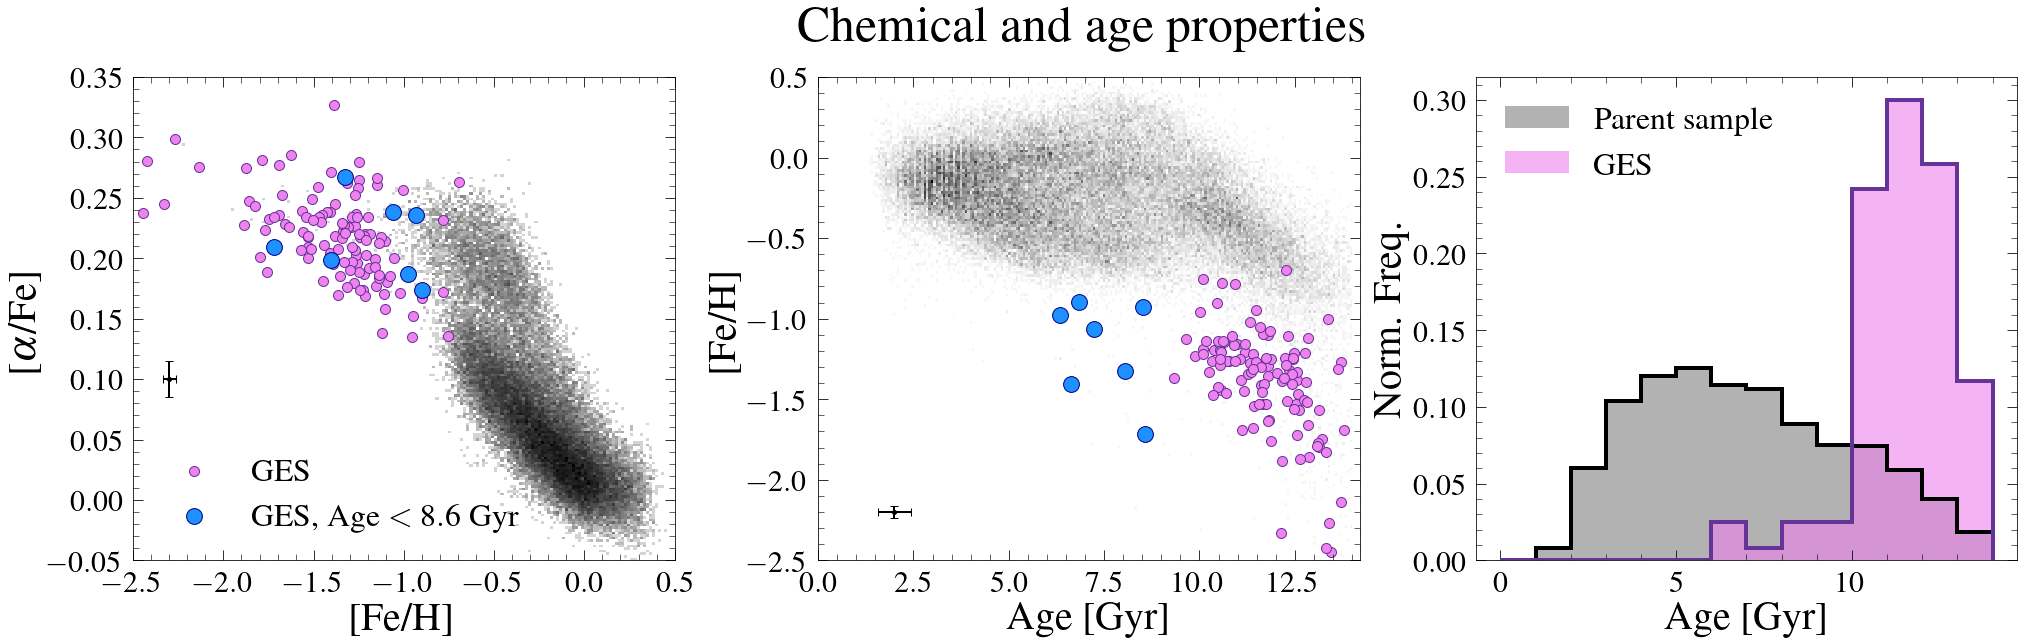

In [70]:
from matplotlib.colors import LogNorm
import cmasher as cm
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Chemical and age properties',fontsize=50,x=0.535,y=1.1)


plt.subplot(1,3,1)
plt.hist2d(data['FEH'][mask_all],data['ALPHA_FE'][mask_all],bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True, label='GES')
plt.scatter(data['FEH'][m],data['ALPHA_FE'][m],s=250,c='dodgerblue',edgecolors='navy',label='GES, Age $<8.6$ Gyr')
plt.xlabel('[Fe/H]',fontsize=40)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=40)
plt.legend(frameon=False, fontsize=32,loc='lower left')
plt.xlim(-2.5,0.5)
plt.ylim(-0.05,0.35)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(-2.3,0.1, xerr = np.nanmean(data['FEH_ERR'][mask]),yerr=np.nanmean(data['ALPHA_FE_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

# cbar_ax = fig.add_axes([0.07, 0.3, 0.14,0.02])
# cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
# cb.set_label(label=r'Age [Gyr]',fontsize=30,labelpad=10)
# cb.ax.tick_params(labelsize=25)
# cb.ax.xaxis.set_ticks_position('bottom')
# cb.ax.xaxis.set_label_position('bottom')

plt.subplot(1,3,2)
plt.hist2d(ages[mask_all],data['FEH'][mask_all],bins=200,cmap='binary',rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['AGE'][mask&mask_ges_f&mask_teff],data['FEH'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(ages[m],data['FEH'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.ylabel('[Fe/H]',fontsize=40)
plt.xlabel(r'Age [Gyr]',fontsize=40)
# plt.legend(frameon=False,fontsize=20)
plt.ylim(-2.5,0.5)
plt.xlim(0,14.2)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(2,-2.2, xerr = np.nanmean(data['AGE_ERR'][mask]),yerr=np.nanmean(data['FEH_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

plt.subplot(1,3,3)
plt.hist(ages[mask_all],bins=np.linspace(0,14,15),histtype='step',lw=4,color='k',density=True)
plt.hist(ages[mask_all],bins=np.linspace(0,14,15),color='k',alpha=0.3,density=True, label='Parent sample')
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),color='violet',alpha=0.6,density=True, label=r'GES')
plt.xlabel('Age [Gyr]',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=32)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-abundance-gala.pdf',dpi=400, bbox_inches = 'tight')



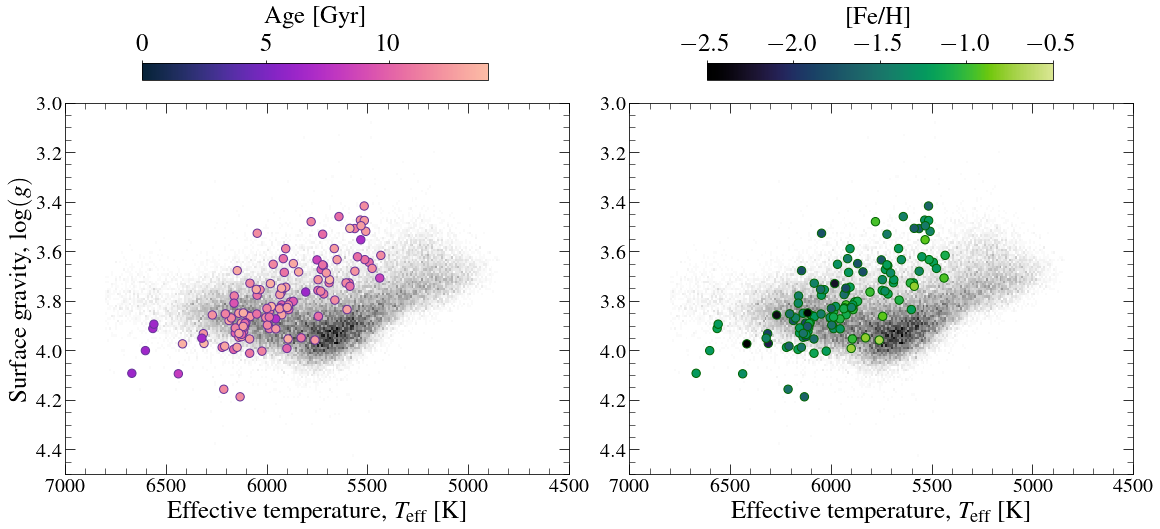

In [54]:
fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Kiel diagram',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=ages[mask&mask_ges_f],vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
plt.ylabel(r'Surface gravity, $\log(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.12, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Age [Gyr]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(1,2,2)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['FEH'][mask&mask_ges_f],vmin=-2.5,vmax=-0.5,cmap=cm.toxic,edgecolors='darkgreen')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
# plt.ylabel(r'Surface gravity, $\log~(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.61, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'[Fe/H]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/Kiel-gala.pdf',dpi=200, bbox_inches = 'tight')


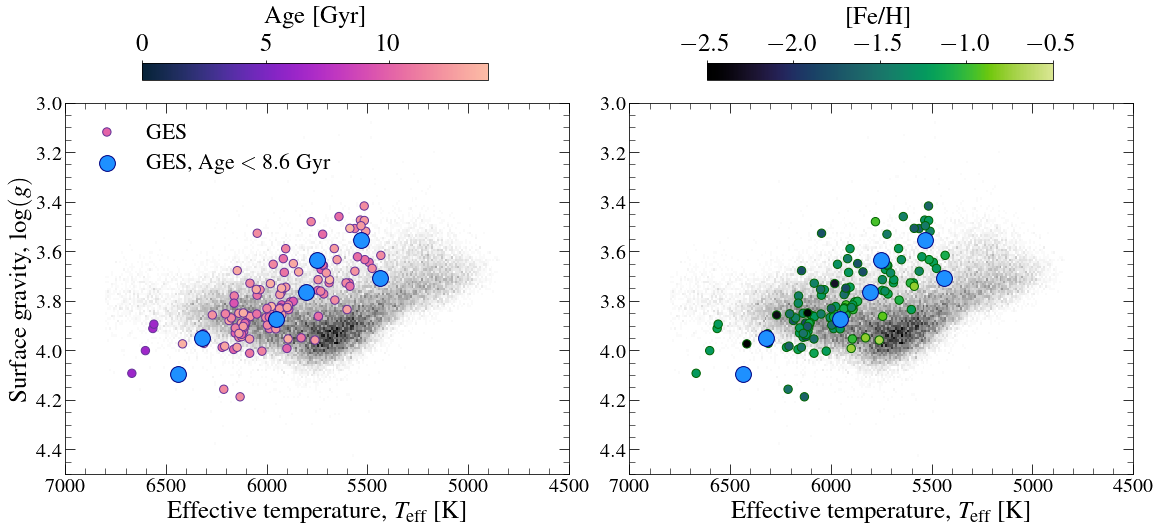

In [38]:
fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Kiel diagram',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['AGE'][mask&mask_ges_f],vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple', label='GES')
plt.scatter(data['TEFF'][m],data['LOGG'][m],s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
plt.ylabel(r'Surface gravity, $\log(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.legend(frameon=False, fontsize=22,loc='upper left')
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.12, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Age [Gyr]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(1,2,2)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['FEH'][mask&mask_ges_f],vmin=-2.5,vmax=-0.5,cmap=cm.toxic,edgecolors='darkgreen')
plt.scatter(data['TEFF'][m],data['LOGG'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
# plt.ylabel(r'Surface gravity, $\log~(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.61, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'[Fe/H]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/Kiel-gala-2.pdf',dpi=200, bbox_inches = 'tight')


# Now you have a clean sample, look at these stars in dynamical space

In [55]:
percen = np.percentile(ages[mask&mask_ges_f&mask_teff], [5,16,50,84,95])
print(percen)

[ 8.57188087 10.45682328 11.62506725 12.76302995 13.36623925]


In [56]:
print(np.mean(ages[mask&mask_ges_f&mask_teff]))
print(np.std(ages[mask&mask_ges_f&mask_teff]))

print(np.mean(data['FEH'][mask&mask_ges_f&mask_teff]))
print(np.std(data['FEH'][mask&mask_ges_f&mask_teff]))

11.460545204136354
1.4281648308228545
-1.367142
0.31593186


In [57]:
# pick the young stars 
m = mask&mask_ges_f&mask_teff&(ages<8.6)
print((data['FEH'][m]))
print((ages[m]))

[-1.7176453 -1.4051273 -0.9302674 -1.0609864 -0.8986116 -0.9779139
 -1.3241386]
[8.57489697 6.62022024 8.5145751  7.22463148 6.84791809 6.33149242
 8.04718567]


In [132]:
print((data['SOURCE_ID_2'][m]))


[ 751738058415860992 1884664845289850368 3398961492273398016
 3722209634435172864 3738962515150426880 3740473965681341440
 3920760165733793152]


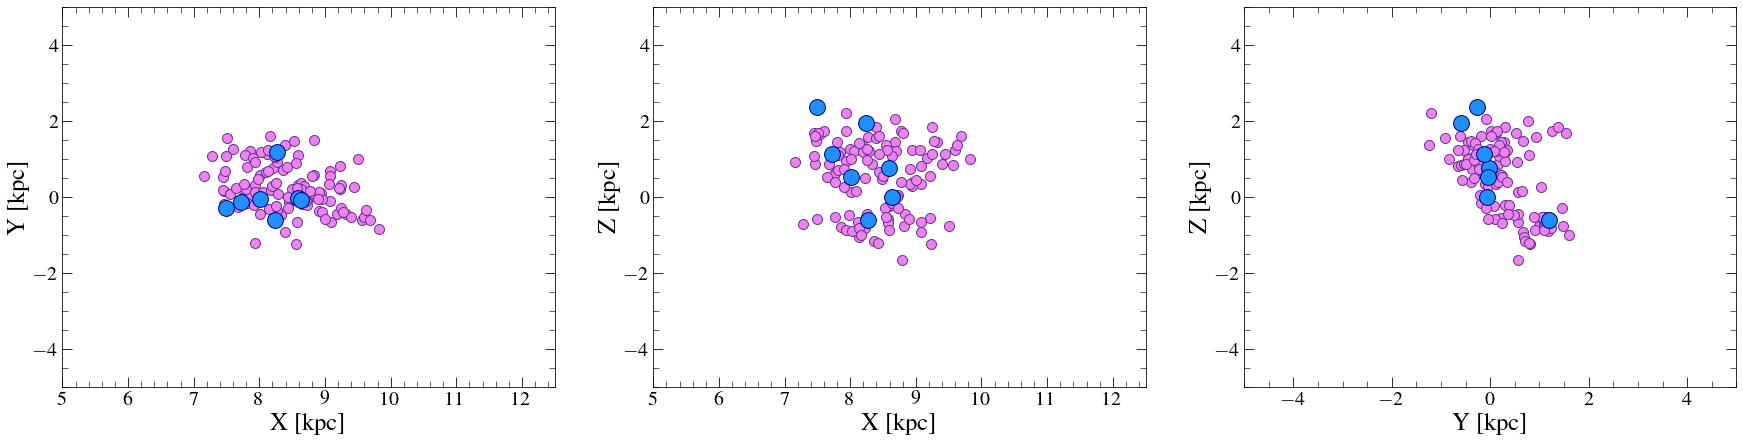

In [58]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['X'][mask&mask_ges_f&mask_teff],data['Y'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['X'][m],data['Y'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('X [kpc]',fontsize=25)
plt.ylabel('Y [kpc]',fontsize=25)
plt.xlim(5,12.5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.scatter(data['X'][mask&mask_ges_f&mask_teff],data['Z'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['X'][m],data['Z'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('X [kpc]',fontsize=25)
plt.ylabel('Z [kpc]',fontsize=25)
plt.xlim(5,12.5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['Y'][mask&mask_ges_f&mask_teff],data['Z'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['Y'][m],data['Z'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('Y [kpc]',fontsize=25)
plt.ylabel('Z [kpc]',fontsize=25)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/positions.pdf',dpi=200, bbox_inches = 'tight')


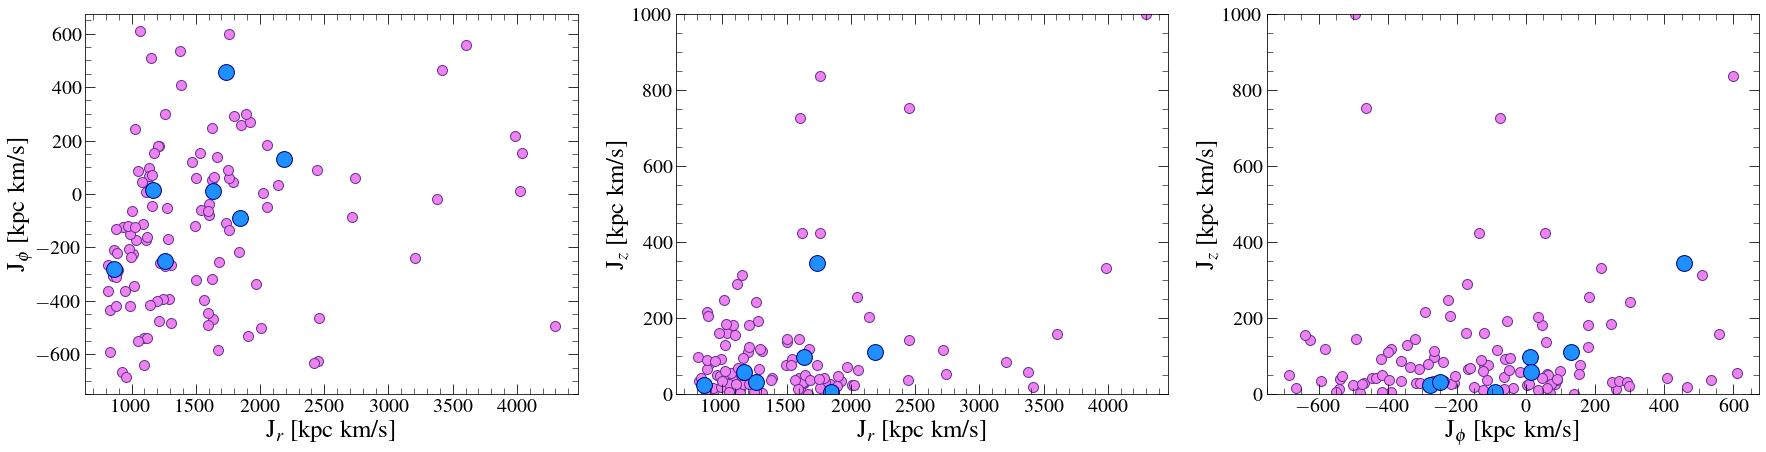

In [59]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['JR'][mask&mask_ges_f&mask_teff],data['JPHI'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JR'][m],data['JPHI'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{r}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{\phi}$ [kpc km/s]',fontsize=25)
# plt.xlim(5,12.5)
# plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.scatter(data['JR'][mask&mask_ges_f&mask_teff],data['JZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JR'][m],data['JZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{r}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{z}$ [kpc km/s]',fontsize=25)
# plt.xlim(5,12.5)
plt.ylim(0,1000)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['JPHI'][mask&mask_ges_f&mask_teff],data['JZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JPHI'][m],data['JZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{\phi}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{z}$ [kpc km/s]',fontsize=25)
# plt.xlim(-5,5)
plt.ylim(0,1000)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/actions.pdf',dpi=200, bbox_inches = 'tight')


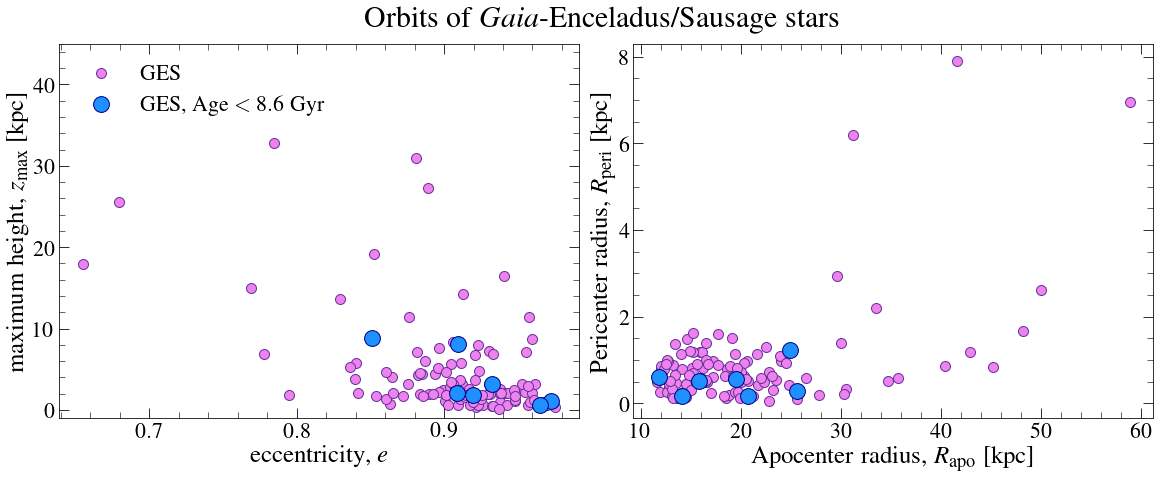

In [15]:
fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)

fig.suptitle(r'Orbits of $Gaia$-Enceladus/Sausage stars',fontsize=30,x=0.52,y=1.08)

plt.subplot(1,2,1)
plt.scatter(data['ecc_1'][mask&mask_ges_f&mask_teff],data['z_max'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['ecc_1'][m],data['z_max'][m],s=250,c='dodgerblue',edgecolors='navy',label='GES, Age $<8.6$ Gyr')
plt.xlabel('eccentricity, $e$',fontsize=25)
plt.ylabel('maximum height, $z_{\mathrm{max}}$ [kpc]',fontsize=25)
# plt.xlim(0,20)
# plt.yscale('log')
plt.legend(frameon=False, fontsize=22,loc='upper left')
plt.ylim(-1,45)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=22,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,2,2)
plt.scatter(data['r_apo_1'][mask&mask_ges_f&mask_teff],data['r_peri'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['r_apo_1'][m],data['r_peri'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('Apocenter radius, $R_{\mathrm{apo}}$ [kpc]',fontsize=25)
plt.ylabel('Pericenter radius, $R_{\mathrm{peri}}$ [kpc]',fontsize=25)
# plt.xlim(0,20)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(-10,10)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=22,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/ecc-gala2.pdf',dpi=200, bbox_inches = 'tight')



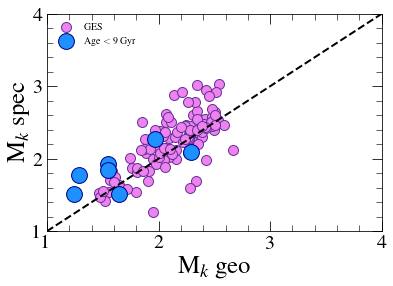

In [71]:
plt.scatter(data['MK_GEO'][mask&mask_ges_f&mask_teff],data['MK_SPEC'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MK_GEO'][m],data['MK_SPEC'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('M$_{k}$ geo',fontsize=25)
plt.ylabel('M$_{k}$ spec',fontsize=25)
plt.plot([1,4],[1,4],ls='dashed',color='k',lw=2)
plt.xlim(1,4)
plt.ylim(1,4)
plt.legend(frameon=False, fontsize=10,loc='upper left')
# plt.ylim(-1,30)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

(array([4.972e+03, 4.711e+03, 1.000e+03, 3.090e+02, 1.550e+02, 9.900e+01,
        5.600e+01, 1.500e+01, 1.500e+01, 4.000e+00]),
 array([0.48207325, 0.75663704, 1.03120089, 1.30576468, 1.58032846,
        1.85489225, 2.12945604, 2.40401983, 2.67858362, 2.95314741,
        3.2277112 ]),
 <BarContainer object of 10 artists>)

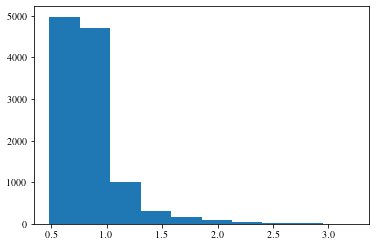

In [186]:
mgh = data['ALPHA_FE'] - data['FEH']
plt.hist(mgh[mask])

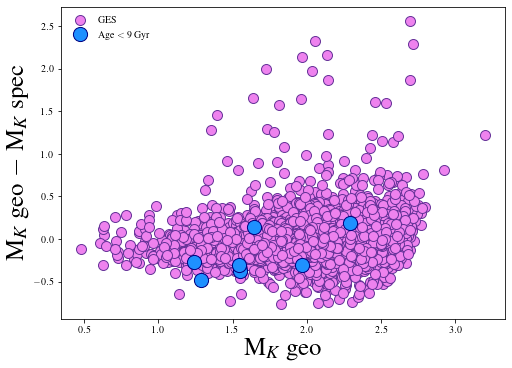

In [183]:
fig = plt.figure(figsize=(7,5),facecolor='white',constrained_layout=True)
plt.scatter(data['MK_GEO'][mask], data['MK_GEO'][mask]-data['MK_SPEC'][mask],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MK_GEO'][m], data['MK_GEO'][m]-data['MK_SPEC'][m],c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr',s=200)
plt.xlabel('M$_{K}$ geo',fontsize=25)
plt.ylabel('M$_{K}$ geo $-$ M$_{K}$ spec',fontsize=25)
plt.legend(frameon=False, fontsize=10,loc='upper left')




In [73]:
#transform to cylindrical velocities
phi = np.arctan(data['xyz'][:,1]/data['xyz'][:,0])
vr = +data['vxyz'][:,0]*np.cos(phi)+data['vxyz'][:,1]*np.sin(phi)
vt = -data['vxyz'][:,0]*np.sin(phi)+data['vxyz'][:,1]*np.cos(phi)

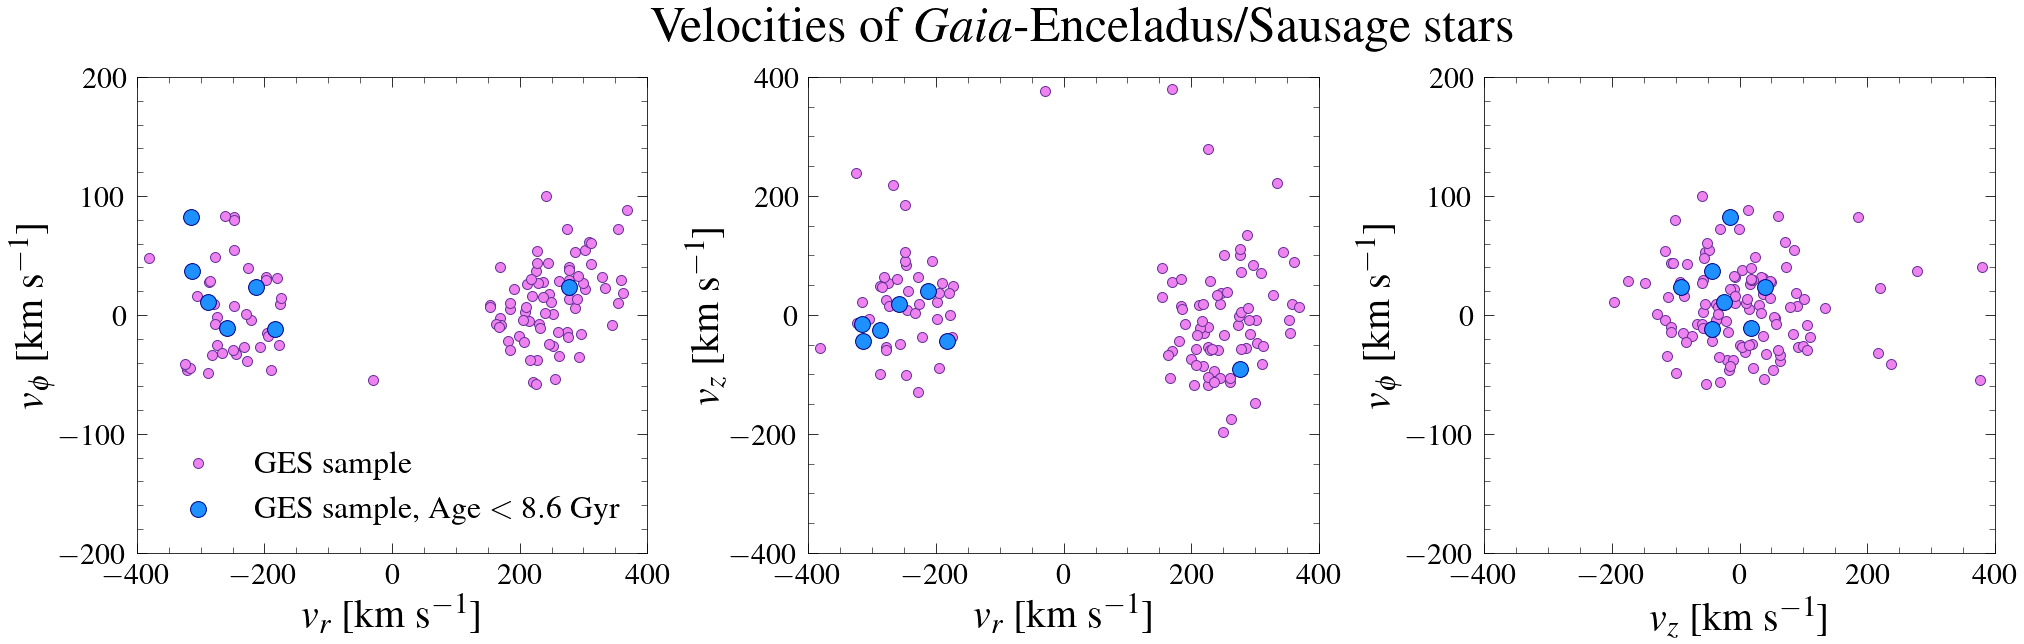

In [77]:
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Velocities of $Gaia$-Enceladus/Sausage stars',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,3,1)
plt.scatter(vr[mask&mask_ges_f&mask_teff],vt[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES sample')
plt.scatter(vr[m],vt[m],s=250,c='dodgerblue',edgecolors='navy',label='GES sample, Age $<8.6$ Gyr')
plt.xlabel('$v_{r}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{\phi}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-200,200)
plt.legend(frameon=False, fontsize=32,loc='lower left')
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.scatter(vr[mask&mask_ges_f&mask_teff],data['vxyz'][:,2][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(vr[m],data['vxyz'][:,2][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$v_{r}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{z}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['vxyz'][:,2][mask&mask_ges_f&mask_teff],vt[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['vxyz'][:,2][m],vt[m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$v_{z}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{\phi}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-200,200)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/velocities-gala.pdf',dpi=200, bbox_inches = 'tight')


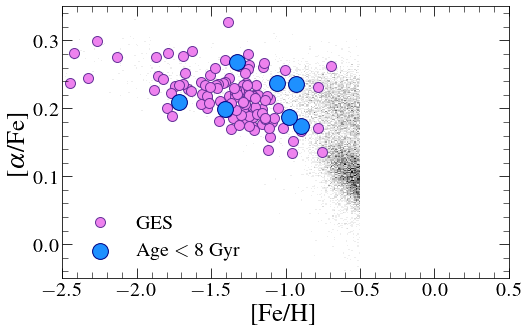

In [78]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(data['FEH'][mask],data['ALPHA_FE'][mask],bins=250,cmap='binary')
plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['FEH'][m],data['ALPHA_FE'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8$ Gyr')
plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='lower left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(-2.5,0.5)
plt.ylim(-0.05,0.35)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# Check also the CMD

In [45]:
# values are from Gaia edr3
mags = data['GAIA_G'] - 5*(np.log10(data['RGEO']))+5
colour =  data['GAIA_BP'] -  data['GAIA_RP']
mask_g = (data['GAIA_G']>-100)& (data['RGEO']>0)&(data['GAIA_BP']>-100)&(data['GAIA_RP']>-100)


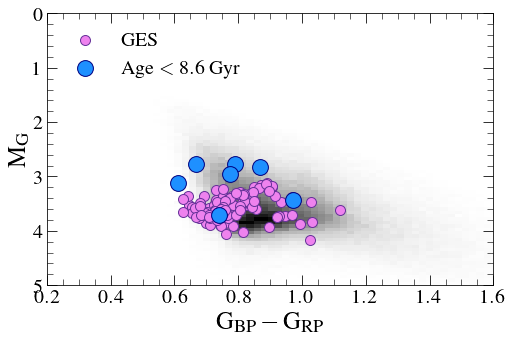

In [81]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(colour[mask_g],mags[mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],mags[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],mags[m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('BP-RP',fontsize=25)
plt.ylabel(r'G',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(5,0)
plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$\mathrm{G}_{\mathrm{BP}} - \mathrm{G}_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

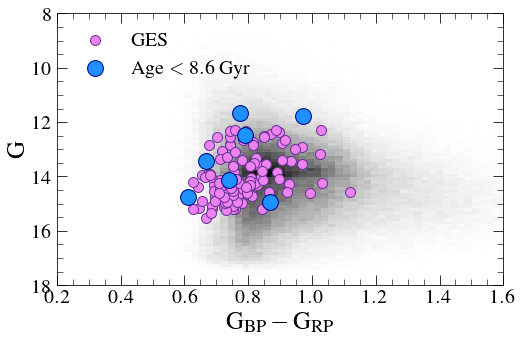

In [47]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(colour[mask_g],data['GAIA_G'][mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],data['GAIA_G'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],data['GAIA_G'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('BP-RP',fontsize=25)
plt.ylabel(r'G',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(18,8)
# plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$\mathrm{G}_{\mathrm{BP}} - \mathrm{G}_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
# values are from Gaia edr3
mags = data['GAIA_G'] - 5*(np.log10(data['RGEO']))+5
colour =  data['GAIA_BP'] -  data['GAIA_RP']
mask_g = (data['GAIA_G']>-100)& (data['RGEO']>0)&(data['GAIA_BP']>-100)&(data['GAIA_RP']>-100)


In [ ]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(colour[mask_g],data['GAIA_G'][mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],data['GAIA_G'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],data['GAIA_G'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('BP-RP',fontsize=25)
plt.ylabel(r'G',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(18,8)
# plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$\mathrm{G}_{\mathrm{BP}} - \mathrm{G}_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# Test the cuts Xiang and Rix 2022 do in their appendix

In [49]:
# mk = ((data['MK_GEO']/data['MK_GEO_ERR']**2)+(data['MK_SPEC']/data['MK_SPEC_ERR']**2))/\
#             (data['MK_GEO_ERR']**-2+data['MK_SPEC_ERR']**-2)

mk = data['MK_COMB']

In [88]:
path_iso1 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-6Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso1 = fits.open(path_iso1)
diso_6 = tb_iso1[1].data 

path_iso2 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-8Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso2 = fits.open(path_iso2)
diso_8 = tb_iso2[1].data 

path_iso3 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-10Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso3 = fits.open(path_iso3)
diso_10 = tb_iso3[1].data 

path_iso4 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-12Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso4 = fits.open(path_iso4)
diso_12 = tb_iso4[1].data 


In [95]:
mag6 = 3.27 - diso_6['logL/Ls']/0.4
mag8 = 3.27 - diso_8['logL/Ls']/0.4
mag10 = 3.27 - diso_10['logL/Ls']/0.4
mag12 = 3.27 - diso_12['logL/Ls']/0.4

# 3.27

In [114]:
print(np.nanmean(data['PARALLAX_ERROR'][mask]))

0.01884080498658736


16142


(4.2, -0.5)

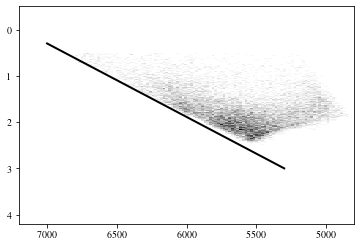

In [176]:
# parent mask to get good quality data
mask_test = (data['AGE']>0)&(data['AGE']<14)&(data['SNR_G']>80)&(data['TEFF']>4000)&(data['TEFF']<7000)&(data['LOGG']>2.)&(data['LOGG']<5)&\
            (~np.isnan(data['ANGLE_PHI']))&(~np.isnan(data['LZ']))&(~np.isnan(data['ecc_1']))&(data['RUWE']<1.2)&\
            ((data['AGE_ERR']/data['AGE'])<0.1)&(data['FEH']>-0.1)
print(len(data[mask_test]))


plt.hist2d(data['TEFF'][mask_test],mk[mask_test],bins=100,cmap='binary')

plt.plot([5300,7000],[3,0.3],lw=2,color='k')
plt.xlim(7200,4800)
plt.ylim(4.2,-0.5)

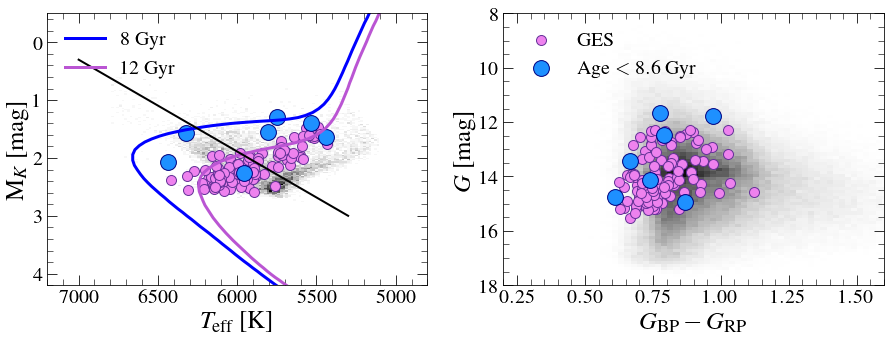

In [170]:
plt.figure(figsize=(15,5),facecolor='white')

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask],mk[mask],bins=100,cmap='binary')
plt.plot(10**diso_8['logT'], mag8,lw=3, ls='-', c='b',label='8 Gyr')
# plt.plot(10**diso_10['logT'], mag10,lw=3, ls='-', c='indigo',label='10 Gyr')
plt.plot(10**diso_12['logT'], mag12,lw=3, ls='-', c='mediumorchid',label='12 Gyr')
plt.scatter(data['TEFF'][mask&mask_ges_f&mask_teff],mk[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['TEFF'][m],mk[m],s=250,c='dodgerblue',edgecolors='navy')
# plt.plot(10**diso_6['logT'], mag6,lw=2, c='dodgerblue',label='6 Gyr')
plt.plot([5300,7000],[3,0.3],lw=2,color='k')

plt.xlabel('Teff',fontsize=25)
plt.ylabel(r'$M_{K}$',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7200,4800)
plt.ylim(4.2,-0.5)
plt.ylabel(r'M$_{K}$ [mag]',fontsize=25)
plt.xlabel(r'$T_{\mathrm{eff}}$ [K]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.errorbar(7000, 3.6, xerr = np.nanmean(data['TEFF_ERR'][mask]),yerr=np.nanmean(data['MK_COMB_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

plt.subplot(1,2,2)
plt.hist2d(colour[mask_g],data['GAIA_G'][mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],data['GAIA_G'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],data['GAIA_G'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.ylabel(r'$G$ [mag]',fontsize=25)
plt.legend(frameon=False, fontsize=20,loc='upper left')

# plt.xlim(0,20)
# plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(18,8)
# plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$G_{\mathrm{BP}} - G_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-robustness-checks.pdf',dpi=200, bbox_inches = 'tight')



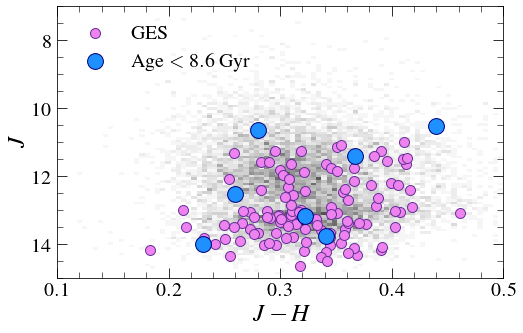

In [24]:
jh = data['J']- data['H']

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jh[mask],data['J'][mask],bins=100,cmap='binary')
plt.scatter(jh[mask&mask_ges_f&mask_teff],data['J'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jh[m],data['J'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-H$',fontsize=25)
plt.ylabel(r'J',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.1,0.5)
plt.ylim(15,7)
plt.ylabel(r'$J$',fontsize=25)
plt.xlabel(r'$J-H$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

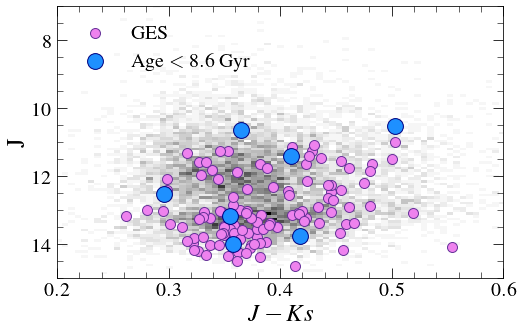

In [28]:
jk = data['J']- data['KS']

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jk[mask],data['J'][mask],bins=100,cmap='binary')
plt.scatter(jk[mask&mask_ges_f&mask_teff],data['J'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jk[m],data['J'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-Ks$',fontsize=25)
plt.ylabel(r'J',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,0.6)
plt.ylim(15,7)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [166]:
print(np.mean(data['FEH'][mask&mask_ges_f&mask_teff]))
print(np.mean(data['ALPHA_FE'][mask&mask_ges_f&mask_teff]))

-1.367142
0.21848942


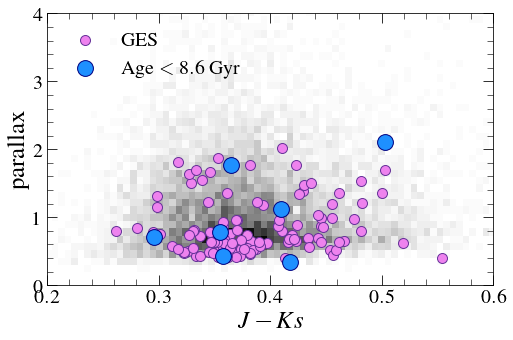

In [43]:
jk = data['J']- data['KS']

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jk[mask],data['PARALLAX'][mask],bins=100,cmap='binary')
plt.scatter(jk[mask&mask_ges_f&mask_teff],data['PARALLAX'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jk[m],data['PARALLAX'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-Ks$',fontsize=25)
plt.ylabel(r'parallax',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,0.6)
plt.ylim(0,4)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

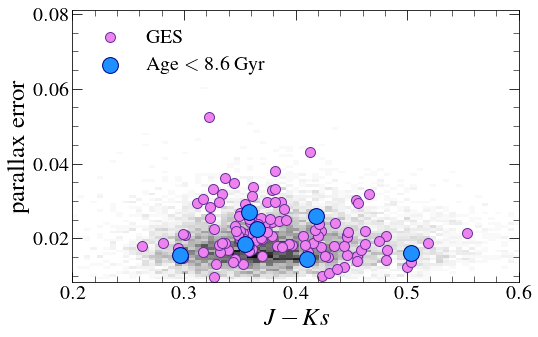

In [48]:

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jk[mask],data['PARALLAX_ERROR'][mask],bins=100,cmap='binary')
plt.scatter(jk[mask&mask_ges_f&mask_teff],data['PARALLAX_ERROR'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jk[m],data['PARALLAX_ERROR'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-Ks$',fontsize=25)
plt.ylabel(r'parallax error',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,0.6)
# plt.ylim(0,4)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

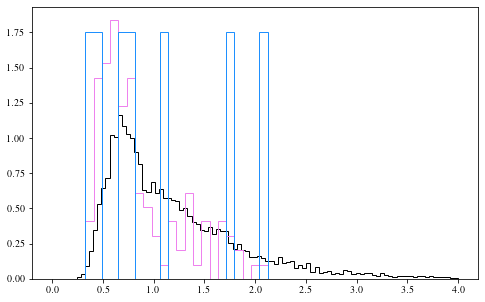

In [35]:

plt.figure(figsize=(8,5),facecolor='white')

plt.hist(data['PARALLAX'][mask], bins=np.linspace(0,4,100), density=True, color='k', histtype='step')
plt.hist(data['PARALLAX'][mask&mask_ges_f&mask_teff], bins=np.linspace(0,4,50), density=True, color='violet', histtype='step')
plt.hist(data['PARALLAX'][m], bins=np.linspace(0,4,50), density=True, color='dodgerblue', histtype='step')
plt.show()


# Save the sample so that it is easily available

In [151]:
mascara = (np.abs(data['LZ'][mask])<700)&(np.sqrt(data['actions'][:,0][mask])>30)&(data['TEFF'][mask]<6500)
boo = np.tile('PARENT',len(data[mask]))
boo2 = np.tile('GES',len(data[mask][mascara]))
print(len(boo))
print(len(boo2))

11336
120


In [152]:
boo[mascara] = boo2


In [163]:
from astropy.table import Table

source_id = data['source_id_1'][mask]
specid = data['SPECID'][mask]
# teff = data['TEFF']
# logg = data['LOGG']
# teff_err = data['TEFF_ERR']
# logg_err = data['LOGG_ERR']
# feh = data['FE_H']
# mgfe = data['MG_FE']
# feh_err = data['FE_H_ERR']
# mgfe_err = data['MG_FE_ERR']
boolean = boo

actions = data['actions'][mask]
zmax = data['z_max'][mask]
rperi = data['r_per'][mask]
rapo = data['r_apo_1'][mask]
ecc = data['ecc_1'][mask]
L = data['L'][mask]
energy = data['E_1'][mask]



t = Table([source_id, specid, actions, L, energy, rperi, rapo, zmax, ecc, boolean], \
          names=('gaia3_sourceid', 'specid', 'actions','L', 'energy', 'rperi', 'rapo', 'zmax', 'ecc', 'in_GES'))

savepath = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/'
t.write(savepath+'subgiant-paper-orbits-gala22.fits', format='fits')



In [ ]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(data['MASS'][mask_g],data['AGE'][mask_g],bins=100,cmap='binary')
plt.scatter(data['MASS'][mask&mask_ges_f&mask_teff],data['AGE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MASS'][m],data['AGE'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('Mass [M$_{\odot}$]',fontsize=25)
plt.ylabel(r'Age [Gyr]',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper right')
# plt.legend(frameon=False,fontsize=20)
# plt.xlim(0)
plt.ylim(0,16)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
def getDust(G, bp, rp, ebv, maxnit=100):
    """
    Compute the Gaia extinctions assuming relations from Babusieux.
    Author: Sergey Koposov skoposov@cmu.edu
    Args:
        G (float): Gaia G mag.
        bp (float): Gaia BP mag.
        rp (float): Gaia RP mag.
        ebv (float): E(B-V), extinction in B-V.
        maxnit (int): number of iterations
    Returns:
        Extinction in G,bp, rp
    """
    c1, c2, c3, c4, c5, c6, c7 = [0.9761, -0.1704,
                                  0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    d1, d2, d3, d4, d5, d6, d7 = [
        1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    e1, e2, e3, e4, e5, e6, e7 = [
        0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    A0 = 3.1*ebv
    P1 = np.poly1d([c1, c2, c3, c4][::-1])

    def F1(bprp): return np.poly1d(
        [c1, c2, c3, c4][::-1])(bprp)+c5*A0+c6*A0**2+c7*bprp*A0

    def F2(bprp): return np.poly1d(
        [d1, d2, d3, d4][::-1])(bprp)+d5*A0+d6*A0**2+d7*bprp*A0

    def F3(bprp): return np.poly1d(
        [e1, e2, e3, e4][::-1])(bprp)+e5*A0+e6*A0**2+e7*bprp*A0
    xind = np.isfinite(bp+rp+G)
    curbp = bp-rp
    for i in range(maxnit):
        AG = F1(curbp)*A0
        Abp = F2(curbp)*A0
        Arp = F3(curbp)*A0
        curbp1 = bp-rp-Abp+Arp

        delta = np.abs(curbp1-curbp)[xind]
        curbp = curbp1

    AG = F1(curbp)*A0
    Abp = F2(curbp)*A0
    Arp = F3(curbp)*A0
    return AG, Abp, Arp




In [ ]:
AG, Abp, Arp = getDust(data['GAIA_G'], data['GAIA_BP'],data['GAIA_RP'],data['EBV'])


In [ ]:
plt.hist(AG[mask])

In [ ]:
plt.figure(figsize=(15,6),facecolor='white')

plt.subplot(1,3,1)
plt.hist(AG[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.hist(Abp[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(Abp[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(Abp[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{bp}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.hist(Arp[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(Arp[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(Arp[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{rp}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


In [ ]:
plt.scatter(AG[mask], Abp[mask],s=10,c='k')
plt.scatter(AG[mask&mask_ges_f&mask_teff], Abp[mask&mask_ges_f&mask_teff],s=100,c='violet')
plt.scatter(AG[m], Abp[m],s=100,c='dodgerblue')
# plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
# plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'$A_{\mathrm{bp}}$',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
plt.scatter(AG[mask], Arp[mask],s=10,c='k')
plt.scatter(AG[mask&mask_ges_f&mask_teff], Arp[mask&mask_ges_f&mask_teff],s=100,c='violet')
plt.scatter(AG[m], Arp[m],s=100,c='dodgerblue')
# plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
# plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'$A_{\mathrm{rp}}$',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# Check that these young stars are not lower SNR, or have high extinction

In [ ]:
print(data['SNR_G'][m])

plt.hist()

In [ ]:
plt.figure(figsize=(16,5),facecolor='white')

plt.subplot(1,2,1)
plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,200,100),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,200,100),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
plt.hist(data['SNR_G'][m],bins=np.linspace(0,200,100),histtype='step',lw=4,color='navy',density=True)
plt.hist(data['SNR_G'][m],bins=np.linspace(0,200,100),color='b',alpha=0.6,density=True, label=r'young stars')


plt.xlabel('SNR',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=26)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.ylim(0,0.14)

# plt.hist(1,2,2)
# plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),histtype='step',lw=4,color='rebeccapurple',density=True)
# plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
# plt.hist(data['SNR_G'][m],bins=np.linspace(0,14,15),histtype='step',lw=4,color='navy',density=True)
# plt.hist(data['SNR_G'][m],bins=np.linspace(0,14,15),color='b',alpha=0.6,density=True, label=r'young stars')


# plt.xlabel('SNR',fontsize=40)
# plt.legend(frameon=False,loc='upper left',fontsize=26)
# plt.ylabel(r'Norm. Freq.',fontsize=40)
# plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
# plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()



# Find 3 doppelgangers for each young star that are old to then compare their spectra

In [ ]:
fehs_young = data['FEH'][m]
alpha_young = data['ALPHA_FE'][m]
teff_young = data['TEFF'][m]
logg_young = data['LOGG'][m]
ids_young = data['source_id_dr2']



In [ ]:
data['RA'][m]

In [ ]:
data['ALPHA_FE'][m]

In [ ]:
print(data['ALPHA_FE'][m],data['ALPHA_FE_ERR'][m],data['FEH'][m],data['FEH_ERR'][m],ages[m],ages_err[m])

In [ ]:
print(data['dr2_radial_velocity'][m])
print(data['VLOS'][m])

In [ ]:
plt.figure(figsize=(20,7),facecolor='white')

plt.subplot(1,2,1)
plt.scatter(data['ecc'][mask&mask_ges_f],data['ZMAX'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['ecc'][m],data['ZMAX'][m],s=40,c='lime')
plt.xlabel('$e$',fontsize=20)
plt.ylabel('$z_{\mathrm{max}}$ [kpc]',fontsize=20)
# plt.xlim(0,20)
# plt.ylim(-10,10)


plt.subplot(1,2,2)
plt.scatter(data['R_APO'][mask&mask_ges_f],data['R_PERI'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['R_APO'][m],data['R_PERI'][m],s=40,c='lime')
plt.xlabel('$R_{\mathrm{apo}}$ [kpc]',fontsize=20)
plt.ylabel('$R_{\mathrm{peri}}$ [kpc]',fontsize=20)
# plt.xlim(0,20)
# plt.ylim(-10,10)


In [ ]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['VR'][mask&mask_ges_f],data['VT'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['VR'][m],data['VT'][m],s=40,c='lime')
plt.xlabel('$v_{r}$ [km/s]',fontsize=20)
plt.ylabel('$v_{\phi}$ [km/s]',fontsize=20)
plt.xlim(-400,400)
plt.ylim(-200,400)


plt.subplot(1,3,2)
plt.scatter(data['VR'][mask&mask_ges_f],data['VZ'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['VR'][m],data['VZ'][m],s=40,c='lime')
plt.xlabel('$v_{r}$ [km/s]',fontsize=20)
plt.ylabel('$v_{z}$ [km/s]',fontsize=20)
plt.xlim(-400,400)
plt.ylim(-400,400)

plt.subplot(1,3,3)
plt.scatter(data['VZ'][mask&mask_ges_f],data['VT'][mask&mask_ges_f],s=10,c='grey')
plt.scatter(data['VZ'][m],data['VT'][m],s=40,c='lime')
plt.xlabel('$v_{z}$ [km/s]',fontsize=20)
plt.ylabel('$v_{\phi}$ [km/s]',fontsize=20)
plt.xlim(-400,400)
plt.ylim(-200,400)


In [ ]:
print( data['GAIA_G'][m])
print( data['GAIA_BP'][m])
print( data['GAIA_RP'][m])

# Check also the CMD

In [ ]:
# values are from Gaia edr3
mags = data['GAIA_G'] - 5*(np.log10(data['RGEO']))+5
colour =  data['GAIA_BP'] -  data['GAIA_RP']


In [ ]:
mag = data['GAIA_G']
bp = data['GAIA_BP']-data['GAIA_RP']
M = mag+5-5*np.log10(1./data['PARALLAX'])

plt.figure(figsize=(10,7),facecolor='white',constrained_layout=True,rasterized=True)

plt.scatter(colour[mask],M[mask],c='gray',s=1)
plt.scatter(bp[mask&mask_ges_f&mask_teff],M[mask&mask_ges_f&mask_teff],c='r',s=10)
plt.scatter(bp[m],M[m],c='lime',s=50)
plt.ylabel('G',fontsize=20)
plt.xlabel(r'bp-rp',fontsize=20)
# plt.xlim(-2.5,0.8)
# plt.ylim(-0.3,0.5)
# plt.vlines(-1,-0.3,0.5,color='r',ls='dashed',lw=2)
